In [7]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = '/content/drive/My Drive/class/'

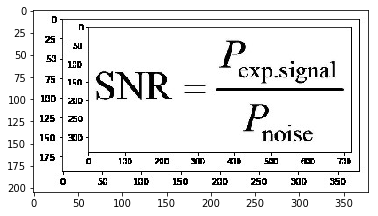

In [9]:
img = cv2.imread(path+'123.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

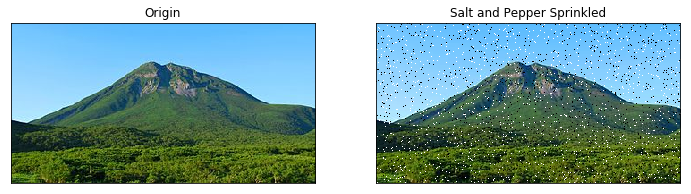

In [10]:
import random
img = cv2.imread(path+'mountain.jpg',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = np.zeros(input.shape,np.uint8)
p = 0.05 # probablity of noise
for i in range (input.shape[0]):
  for j in range(input.shape[1]):
    r = random.random()
    if r < p/2:
      output[i][j] = 0,0,0
    elif r < p:
      output[i][j] = 255,255,255
    else:
      output[i][j] = input[i][j]
  
plt.figure(num='Noise e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(1,2,1),plt.title('Origin')
plt.imshow(input),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.title('Salt and Pepper Sprinkled')

plt.imshow(output),plt.xticks([]),plt.yticks([])
plt.show()

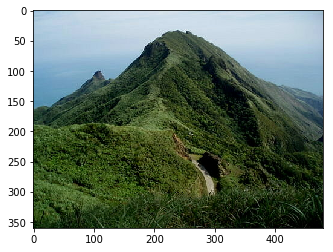

In [11]:
img = cv2.imread(path+'mountain2.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

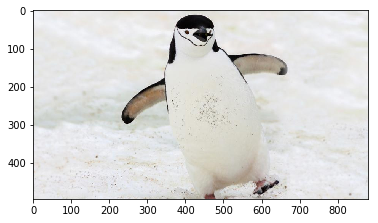

In [12]:
img = cv2.imread(path+'penguin.jpg', cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [13]:
K = np.ones((3,3), np.uint32)/9
K

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

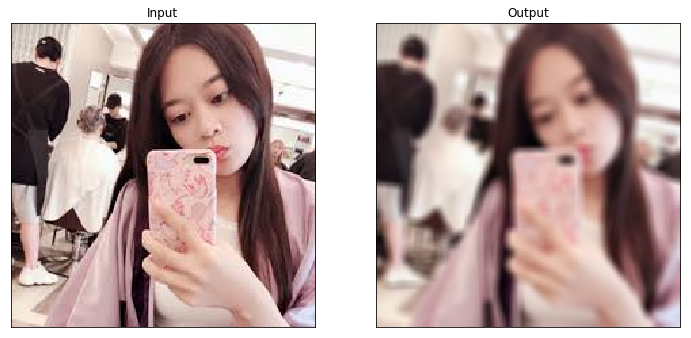

In [14]:
img = cv2.imread(path+'107111.jpg',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = cv2.filter2D(input,-1,np.ones((7,7),np.float32)/49)# -1 means the same depth as the source
plt.figure(num='2D convolution e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.show()

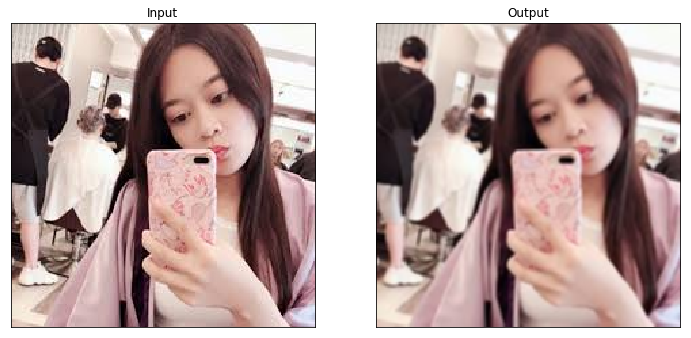

In [15]:
img = cv2.imread(path+'107111.jpg',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = cv2.boxFilter(input,-1,(3,3),normalize=True)# -1 means the same depth as the source image
plt.figure(num='less smoothing e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.show()

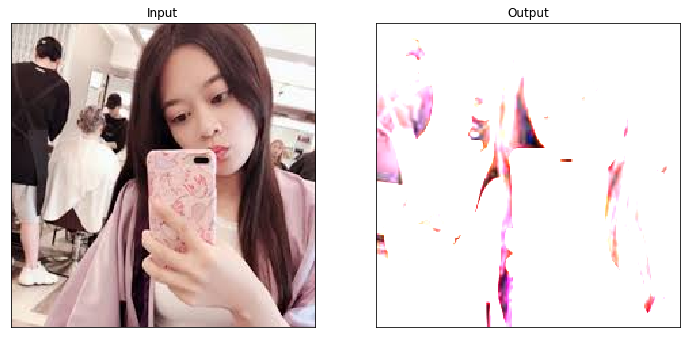

In [16]:
img = cv2.imread(path+'107111.jpg',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = cv2.boxFilter(input,-1,(3,3),normalize=False)# -1 means the same depth as the source image
plt.figure(num='less smoothing e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.show()

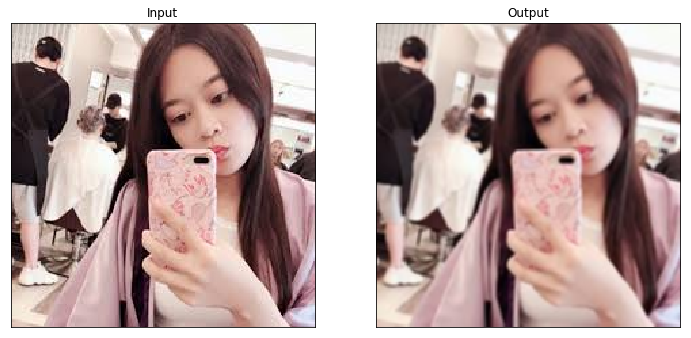

In [17]:
img = cv2.imread(path+'107111.jpg',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = cv2.blur(input,(3,3))# =cv2.boxFilter(input,-1,(3,3),normalize=True)
plt.figure(num='less smoothing e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Input')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Output')
plt.xticks([]), plt.yticks([])
plt.show()

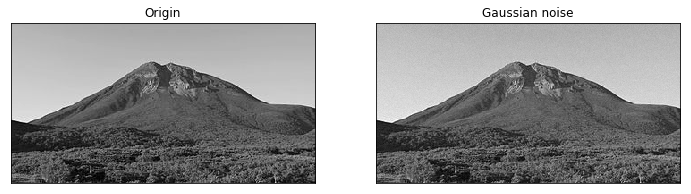

In [18]:
# Parameters
# ----------
# image : ndarray
# Input image data. Will be converted to float.
# mode : str
# One of the following strings, selecting the type of noise to add:
# 'gauss' Gaussian-distributed additive noise.
# 'poisson' Poisson-distributed noise generated from the data.
# 's&p' Replaces random pixels with 0 or 1.
# 'speckle' Multiplicative noise using out = image + n*image,where
# n is uniform noise with specified mean & variance.
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
  if noise_typ == "gauss":
    mean = 0
    var = 10 #0.1
    sigma = var**0.5
    
    if len(image.shape) == 2:
      row,col = image.shape
      gauss = np.random.normal(mean,sigma,(row,col))
      noisy = np.zeros(image.shape, np.float32)
      noisy = image + gauss
    else:
      row,col,ch = image.shape
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      noisy = np.zeros(image.shape, np.float32)
      noisy[:, :, 0] = image[:, :, 0] + gauss[:, :, 0]
      noisy[:, :, 1] = image[:, :, 1] + gauss[:, :, 1]
      noisy[:, :, 2] = image[:, :, 2] + gauss[:, :, 2]
      
    cv2.normalize(noisy, noisy, 0, 255, cv2.NORM_MINMAX, dtype=-1)
    noisy = noisy.astype(np.uint8)
    return noisy

img = cv2.imread(path+'mountain.jpg',cv2.IMREAD_GRAYSCALE)
input = img
# input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = noisy("gauss",input)
plt.figure(num='Gaussian noise e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(1,2,1),plt.title('Origin')
plt.imshow(input,cmap='gray')
# plt.imshow(input)
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.title('Gaussian noise')
plt.imshow(output,cmap='gray')
# plt.imshow(output)
plt.xticks([]),plt.yticks([])
plt.show()

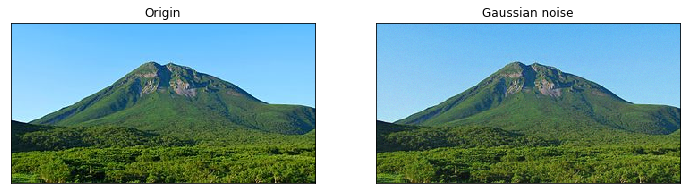

In [19]:
img = cv2.imread(path+'mountain.jpg',1)
# input = img
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = noisy("gauss",input)
plt.figure(num='Gaussian noise e.g',figsize=(12,8)) #1 inch = 0.39cm

plt.subplot(1,2,1),plt.title('Origin')
# plt.imshow(input,cmap='gray')
plt.imshow(input)
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.title('Gaussian noise')
# plt.imshow(output,cmap='gray')
plt.imshow(output)
plt.xticks([]),plt.yticks([])
plt.show()

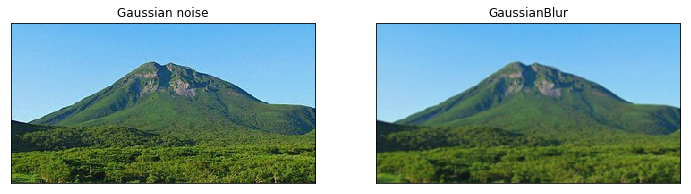

In [20]:
input = output
output = cv2.GaussianBlur(input,(3,3),0)
plt.figure(num='Gaussianblur e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(1,2,1),plt.title('Gaussian noise')
plt.imshow(input)
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.title('GaussianBlur')
plt.imshow(output)
plt.xticks([]),plt.yticks([])
plt.show()

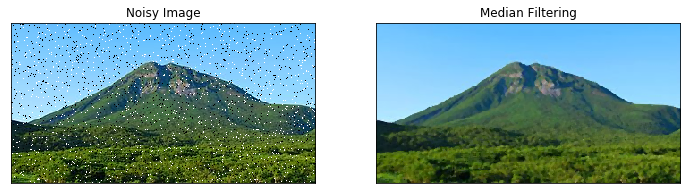

In [21]:
img = cv2.imread(path+'mountain.jpg',1)
input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
output = np.zeros(input.shape,np.uint8)
p = 0.05 # probablity of noise
for i in range (input.shape[0]):
  for j in range(input.shape[1]):
    r = random.random()
    if r < p/2:
      output[i][j] = 0,0,0
    elif r < p:
      output[i][j] = 255,255,255
    else:
      output[i][j] = input[i][j]
      
noise_removed = cv2.medianBlur(output,3)

plt.figure(num='Medianblur e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(output),plt.title('Noisy Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noise_removed),plt.title('Median Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

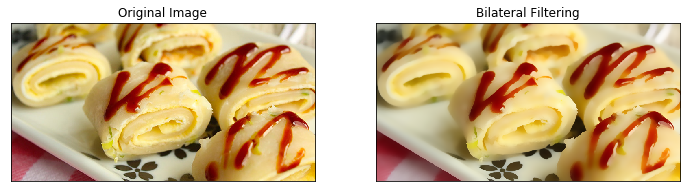

In [22]:
img = cv2.imread(path+'k11.jpg',1)

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

output = cv2.bilateralFilter(input,19,75,75)

plt.figure(num='Bilateralfilter e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('Bilateral Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

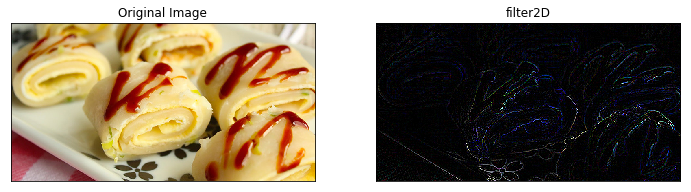

In [23]:
img = cv2.imread(path+'k11.jpg',1)

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernel = np.array([ [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1] ])

output = cv2.filter2D(input, -1, kernel)

plt.figure(num='Filter2d e.g',figsize=(12,8)) #1 inch = 0.39cm
plt.subplot(121),plt.imshow(input),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output),plt.title('filter2D')
plt.xticks([]), plt.yticks([])
plt.show()

[[0.00310794]
 [0.01474721]
 [0.04950763]
 [0.11758703]
 [0.1975931 ]
 [0.23491418]
 [0.1975931 ]
 [0.11758703]
 [0.04950763]
 [0.01474721]
 [0.00310794]]
(11, 1)


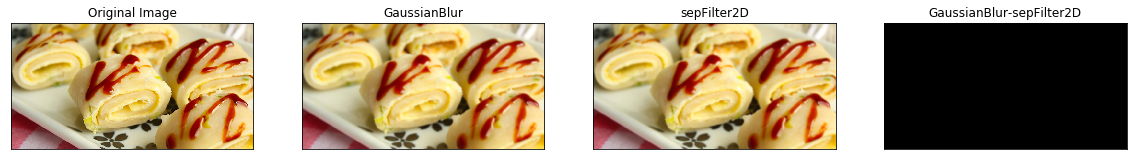

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [24]:
img = cv2.imread(path+'k11.jpg',1)

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernel = cv2.getGaussianKernel( 11, 1.7 )

print(kernel)

print(kernel.shape)

gBlurImg = cv2.GaussianBlur(input, (11,11), 1.7)

#this is how the GaussianBlur function actually works:
twoD = cv2.sepFilter2D(input, -1, kernel, kernel)
diff = twoD - gBlurImg

plt.figure(num='Filter2d e.g',figsize=(20,5)) #1 inch = 0.39cm
plt.subplot(141),plt.imshow(input),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gBlurImg),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(twoD),plt.title('sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('GaussianBlur-sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.show()
print(diff)

[[0.00310794]
 [0.01474721]
 [0.04950763]
 [0.11758703]
 [0.1975931 ]
 [0.23491418]
 [0.1975931 ]
 [0.11758703]
 [0.04950763]
 [0.01474721]
 [0.00310794]]
(11, 1)


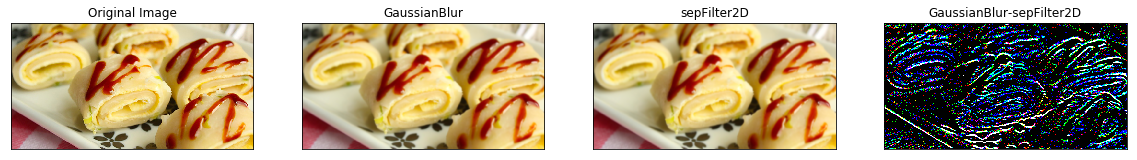

In [25]:
img = cv2.imread(path+'k11.jpg',1)

input = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

kernel = cv2.getGaussianKernel( 11, 1.7 )
kernel2 = cv2.getGaussianKernel( 11, 1.9 )

print(kernel)

print(kernel.shape)

gBlurImg = cv2.GaussianBlur(input, (11,11), 1.7)

#this is how the GaussianBlur function actually works:
twoD = cv2.sepFilter2D(input, -1, kernel, kernel2)
diff = twoD - gBlurImg

plt.figure(num='Filter2d e.g',figsize=(20,5)) #1 inch = 0.39cm
plt.subplot(141),plt.imshow(input),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gBlurImg),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(twoD),plt.title('sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('GaussianBlur-sepFilter2D')
plt.xticks([]), plt.yticks([])
plt.show()